## Plot the locations of all profiles

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import json
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import time
from datetime import date
import io
import json
import seawater
import sys

In [4]:
# location and name of the maskfile of the model configuration
coordfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_hgr.nc4'
maskfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mask.nc4'
zgrdfile='/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-I/MEDWEST60_mesh_zgr.nc4'
# period of the simulation (year,month,day)
ymin=2010;mmin=1;dmin=1;datemin=datetime.date(ymin,mmin,dmin)
ymax=2010;mmax=9;dmax=30;datemax=datetime.date(ymax,mmax,dmax)
# depth of the desired comparison profile in m
depthmin=500
# radius of the circle around the profile location in which we take the modeled profiles, in °  
radius_max=0.25
# period of time around the profile sampling date in which we take the modeled profiles, in days
period=5
# minimum amount of model profiles to be considered to make a significant statistical comparison, for instance in a 1° square and 30-days window we have 2.6 millions modeled profiles, in a 0.5°x10 days 216 000
number_of_model_profiles=100000
# name of the json file in which selection of profiles informations will be stored
jsonfile='txt/MEDWEST60_'+str(datemin)+'-'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.json'

In [5]:
print(jsonfile)

txt/MEDWEST60_2010-01-01-2010-09-30_500m_0.25x5d_100000.json


In [6]:
sourcefile=open(str(jsonfile),'rU',encoding='utf-8')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
list_profiles=infos.keys()

all_lat=np.zeros((nb_profilesEN4))
all_lon=np.zeros((nb_profilesEN4))
    
for prof in np.arange(nb_profilesEN4):
    reference =  str(list(list_profiles)[prof])
    lat_prof = infos[reference]['latitude']
    lon_prof = infos[reference]['longitude']
    all_lat[prof]=lat_prof
    all_lon[prof]=lon_prof


<ipython-input-6-cabf53e97680>:1: DeprecationWarning: 'U' mode is deprecated
  sourcefile=open(str(jsonfile),'rU',encoding='utf-8')


In [7]:
ds=xr.open_dataset(maskfile)
lat=ds.nav_lat
lon=ds.nav_lon
tmask=ds.tmask
lat_mask=np.ma.masked_where(tmask[0,0]==0.,lat)
lon_mask=np.ma.masked_where(tmask[0,0]==0.,lon)
latmin,latmax,lonmin,lonmax=(lat_mask.min(),lat_mask.max(),lon_mask.min(),lon_mask.max())
datemin=datetime.date(ymin,mmin,dmin)
datemax=datetime.date(ymax,mmax,dmax)


In [8]:
len(all_lon)

248

In [11]:
def map_profiles_from_jsonfile(all_lat,all_lon):
    fig=plt.figure(figsize=(20,15))
    ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
    ax.set_extent((lonmin, lonmax, latmin, latmax))
    ax.coastlines(resolution="10m")
    gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.tick_params('both',labelsize=22)

    plt.scatter(all_lon, all_lat, c='g', linewidth='0', s=18);
    plt.title('There are '+str(len(all_lon))+' '+str(depthmin)+'m-deep EN4 profiles in MEDWEST60 for '+str(datemin)+' to '+str(datemax)+' period with model outputs in a '+str(radius_max)+'° radius and '+str(period)+' days period around', size=20);
    plt.savefig('plots/MEDWEST60_y'+str(datemin)+'-y'+str(datemax)+'_'+str(depthmin)+'m_'+str(radius_max)+'x'+str(period)+'d_'+str(number_of_model_profiles)+'.png')


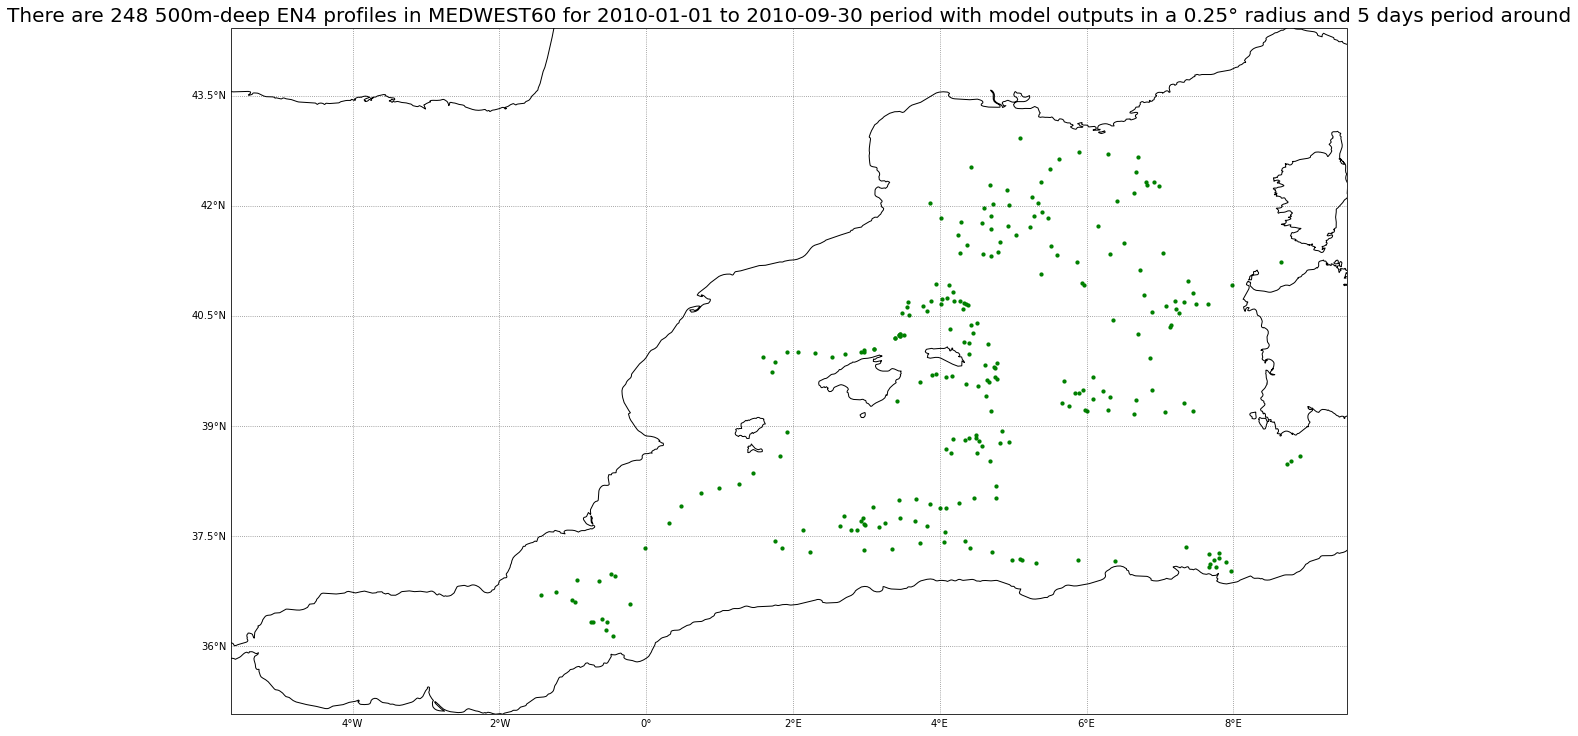

In [12]:
map_profiles_from_jsonfile(all_lat,all_lon)